Import și citire date

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_noai = pd.read_csv("session_no_ai.csv")
df_ai = pd.read_csv("session_ai.csv")

df_noai["t0"] = df_noai["timestamp"] - df_noai["timestamp"].iloc[0]
df_ai["t0"] = df_ai["timestamp"] - df_ai["timestamp"].iloc[0]

df_noai.head(), df_ai.head()


(      timestamp        fps  frame_time_ms  hailo_score  hailo_valid  \
 0  1.763921e+09   0.770988    1297.036886          0.0            0   
 1  1.763921e+09  20.422462      48.965693          0.0            0   
 2  1.763921e+09  17.144520      58.327675          0.0            0   
 3  1.763921e+09  16.741256      59.732676          0.0            0   
 4  1.763921e+09  18.980812      52.684784          0.0            0   
 
    mediapipe_points  command  tcp_sent  tcp_reconnected  cx  cy        t0  
 0                 0  No hand         1                0  -1  -1  0.000000  
 1                 0  No hand         0                0  -1  -1  0.207219  
 2                 0  No hand         0                0  -1  -1  0.287717  
 3                 0  No hand         0                0  -1  -1  0.355654  
 4                 0  No hand         0                0  -1  -1  0.417305  ,
       timestamp        fps  frame_time_ms  hailo_score  hailo_valid  \
 0  1.763921e+09   1.888082    

Comparare FPS

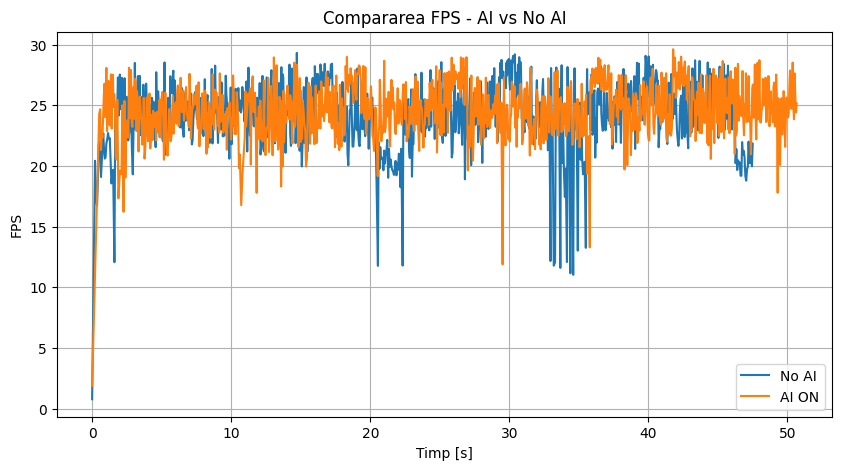

In [2]:
plt.figure(figsize=(10,5))
plt.plot(df_noai["t0"], df_noai["fps"], label="No AI")
plt.plot(df_ai["t0"], df_ai["fps"], label="AI ON")
plt.xlabel("Timp [s]")
plt.ylabel("FPS")
plt.title("Compararea FPS - AI vs No AI")
plt.legend()
plt.grid(True)
plt.savefig("compare_fps.png", dpi=150)
plt.show()


Compararea latenței pe cadru

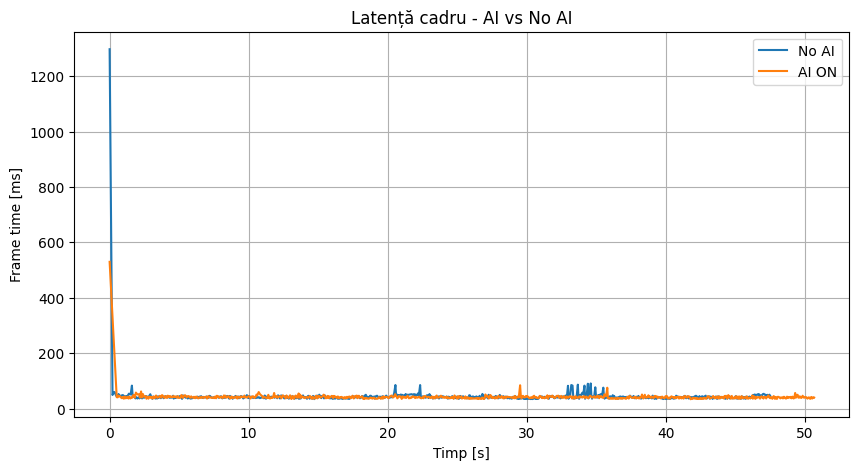

In [3]:
plt.figure(figsize=(10,5))
plt.plot(df_noai["t0"], df_noai["frame_time_ms"], label="No AI")
plt.plot(df_ai["t0"], df_ai["frame_time_ms"], label="AI ON")
plt.xlabel("Timp [s]")
plt.ylabel("Frame time [ms]")
plt.title("Latență cadru - AI vs No AI")
plt.legend()
plt.grid(True)
plt.savefig("compare_frame_time.png", dpi=150)
plt.show()


Compararea stabilității comenzilor

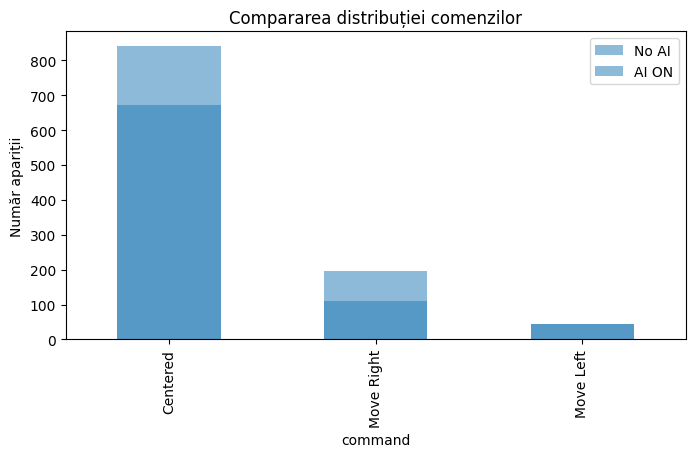

In [4]:
plt.figure(figsize=(8,4))
df_noai["command"].value_counts().plot(kind="bar", alpha=0.5, label="No AI")
df_ai["command"].value_counts().plot(kind="bar", alpha=0.5, label="AI ON")
plt.title("Compararea distribuției comenzilor")
plt.ylabel("Număr apariții")
plt.legend()
plt.savefig("compare_command_distribution.png", dpi=150)
plt.show()


Compararea „No hand” false positives

In [5]:
noai_nohand_ratio = (df_noai["command"] == "No hand").mean()
ai_nohand_ratio = (df_ai["command"] == "No hand").mean()

print("False No-Hand ratio:")
print("NO AI:", noai_nohand_ratio)
print("AI ON:", ai_nohand_ratio)


False No-Hand ratio:
NO AI: 0.045744680851063826
AI ON: 0.0


Heatmap centroid AI vs No-AI

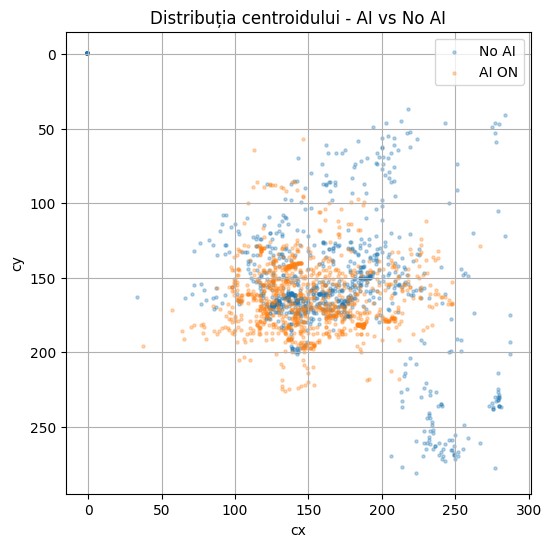

In [6]:
plt.figure(figsize=(6,6))
plt.scatter(df_noai["cx"], df_noai["cy"], s=5, alpha=0.3, label="No AI")
plt.scatter(df_ai["cx"], df_ai["cy"], s=5, alpha=0.3, label="AI ON")
plt.gca().invert_yaxis()
plt.xlabel("cx")
plt.ylabel("cy")
plt.title("Distribuția centroidului - AI vs No AI")
plt.legend()
plt.grid(True)
plt.savefig("compare_centroid_distrib.png", dpi=150)
plt.show()


Tabel comparativ statistic

In [7]:
compare_stats = pd.DataFrame({
    "FPS mediu": [df_noai["fps"].mean(), df_ai["fps"].mean()],
    "Latență medie (ms)": [df_noai["frame_time_ms"].mean(), df_ai["frame_time_ms"].mean()],
    "Procent No hand": [(df_noai["command"]=="No hand").mean(),
                        (df_ai["command"]=="No hand").mean()],
    "Comenzi trimise": [df_noai["tcp_sent"].sum(), df_ai["tcp_sent"].sum()],
    "Hailo valid ratio (AI only)": [0, df_ai["hailo_valid"].mean()],
}, index=["NO AI", "AI ON"])

compare_stats


,FPS mediu,Latență medie (ms),Procent No hand,Comenzi trimise,Hailo valid ratio (AI only)
NO AI,24.223366,43.231051,0.045745,75,0.0
AI ON,24.678017,41.312534,0.000000,59,0.0
